In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from os.path import exists
import sklearn.linear_model as lm

import sys
sys.path.insert(0, "../util/")
import util as util

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [2]:
amesHousing = pd.read_csv('../data/Ames_Housing_Price_Data.csv')
amesRealEstate = pd.read_csv('../data/Ames_Real_Estate_Data.csv')

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
amesHousing.head()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
amesRealEstate.head()

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4599.0,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1,520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4507.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
2,520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4513.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
3,520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,3449.0,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
4,520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4506.0,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [5]:
amesHousing['MSSubClass'] = amesHousing['MSSubClass'].apply(str)

In [6]:
amesHousing['MSSubClass'].dtype

dtype('O')

In [7]:
amesHousingCategoricalData = amesHousing.select_dtypes(include=['O'])

In [8]:
amesHousingCategoricalData["Alley"].value_counts()

Grvl    105
Pave     63
Name: Alley, dtype: int64

In [9]:
for col in amesHousingCategoricalData.columns:
    print(col)
    print(set(amesHousing[col]))
    if (amesHousing[col].isnull().values.any()):
        print(amesHousing[col].value_counts())
        print(f'{amesHousing[col].isnull().sum()} nan values')

MSSubClass
{'70', '50', '85', '150', '40', '30', '60', '20', '160', '45', '190', '80', '90', '75', '120', '180'}
MSZoning
{'RM', 'FV', 'C (all)', 'I (all)', 'RL', 'A (agr)', 'RH'}
Street
{'Grvl', 'Pave'}
Alley
{nan, 'Grvl', 'Pave'}
Grvl    105
Pave     63
Name: Alley, dtype: int64
2412 nan values
LotShape
{'IR3', 'IR1', 'Reg', 'IR2'}
LandContour
{'Lvl', 'Bnk', 'HLS', 'Low'}
Utilities
{'NoSewr', 'AllPub'}
LotConfig
{'FR3', 'CulDSac', 'Inside', 'Corner', 'FR2'}
LandSlope
{'Mod', 'Gtl', 'Sev'}
Neighborhood
{'Timber', 'Crawfor', 'Blueste', 'NridgHt', 'Gilbert', 'StoneBr', 'BrkSide', 'Sawyer', 'CollgCr', 'Veenker', 'IDOTRR', 'Edwards', 'BrDale', 'SWISU', 'NPkVill', 'NAmes', 'Greens', 'Blmngtn', 'NoRidge', 'Mitchel', 'ClearCr', 'SawyerW', 'NWAmes', 'GrnHill', 'MeadowV', 'OldTown', 'Landmrk', 'Somerst'}
Condition1
{'RRAn', 'Feedr', 'RRNe', 'RRAe', 'Norm', 'PosA', 'Artery', 'PosN', 'RRNn'}
Condition2
{'RRAn', 'Feedr', 'RRAe', 'Norm', 'PosA', 'Artery', 'PosN', 'RRNn'}
BldgType
{'Twnhs', 'Duplex

In [10]:
for col in amesHousingCategoricalData.columns:
    if (amesHousing[col].isnull().values.any()):
        print(amesHousing[amesHousing[col]=='nan'].shape[0])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [11]:
for col in amesHousingCategoricalData.columns:
    amesHousing[col]=amesHousing[col].fillna('nan')

In [12]:
for col in amesHousingCategoricalData.columns:
    if (amesHousing[col].isnull().values.any()):
        print(amesHousing[amesHousing[col]=='nan'].shape[0])

In [13]:
pd.get_dummies(amesHousing['Utilities'],prefix='Utilites',drop_first=True)

,Utilites_NoSewr
0,0
1,0
2,0
3,0
4,0
...,...
2575,0
2576,0
2577,0
2578,0


In [14]:
a = {1:1,2:2,3:3}

In [15]:
5 in a.keys()

False

In [16]:
relatedDummiesDictionary = {}
for col in amesHousingCategoricalData.columns:
    dummyData = pd.get_dummies(amesHousing[col],prefix=col,drop_first=True)
    for dummyCol in dummyData.columns:
        relatedDummiesDictionary[str(dummyCol)] = list(dummyData.columns)
    amesHousing = pd.concat([amesHousing,dummyData],axis=1)

In [17]:
set(amesHousing.dtypes)

{dtype('uint8'), dtype('int64'), dtype('float64'), dtype('O')}

In [18]:
amesHousingNumericalData = amesHousing.select_dtypes(include=['uint8','int64','float64'])
[col for col in amesHousingNumericalData.columns if amesHousingNumericalData[col].isnull().values.any()]

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [19]:
testList = [1,2,3,10000]
print(np.std(np.array(testList)))
print(np.mean(np.array(testList)))
util.markOutliers(testList)

4329.261051264984
2501.5


array([False, False, False, False])

In [20]:
print(f'{amesHousingNumericalData.shape[0]} rows before removing outliers')
amesHousingNumericalData = util.removeOutliers(amesHousingNumericalData.fillna(0.0))
print(f'{amesHousingNumericalData.shape[0]} rows after removing outliers')

2580 rows before removing outliers
150 rows after removing outliers


In [21]:
corr = amesHousingNumericalData.corr()
corr

,Unnamed: 0,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Unnamed: 0,1.000000,-0.071868,0.091394,-0.039620,-0.117519,-0.082550,-0.068935,0.072914,-0.225896,-0.227717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PID,-0.071868,1.000000,-0.166260,-0.100704,0.100772,-0.004656,0.149906,-0.116576,0.217928,0.185422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrLivArea,0.091394,-0.166260,1.000000,0.627436,-0.027137,0.315870,0.372949,-0.199040,0.044686,0.063791,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,-0.039620,-0.100704,0.627436,1.000000,0.280470,0.506628,0.766452,-0.167243,0.357089,0.363983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,-0.117519,0.100772,-0.027137,0.280470,1.000000,0.267819,0.288259,-0.015236,0.303322,0.304147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition_Alloca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition_Family,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition_Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

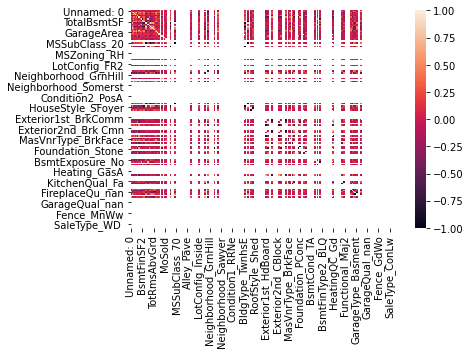

In [22]:
sns.heatmap(corr)

In [23]:
correlationList = []
pairList = []
pValList = []
for i in range(len(amesHousingNumericalData.columns)):
    for j in range(len(amesHousingNumericalData.columns)):
        if i<j:
            iColumn = amesHousingNumericalData.columns[i]
            jColumn = amesHousingNumericalData.columns[j]
            pairList.append(iColumn+'-'+jColumn)
            corrVal,pVal = stats.spearmanr(amesHousingNumericalData[iColumn],
                                          amesHousingNumericalData[jColumn])
            correlationList.append(corrVal)
            pValList.append(pVal)

amesHousingCorreltaion = pd.DataFrame({"pair":pairList,
                                "corr":correlationList,
                                "pVal":pValList
                               },columns=["pair","corr","pVal"]).sort_values(by=["pVal","corr"],
                                                                             ascending=[True,False])
            
            

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [24]:
amesHousingSigCorrs = amesHousingCorreltaion[(np.isnan(amesHousingCorreltaion['pVal'])==False) & (amesHousingCorreltaion['pVal'] < 0.05)]

In [25]:
absRValues = abs(amesHousingSigCorrs['corr'])

In [26]:
type(amesHousingSigCorrs)

pandas.core.frame.DataFrame

In [27]:
print(amesHousingSigCorrs.size)
amesHousingSigCorrs = amesHousingSigCorrs[abs(amesHousingSigCorrs['corr']) > absRValues.quantile()]
print(amesHousingSigCorrs.size)

2973
1485


array([[<AxesSubplot:title={'center':'corr'}>,
        <AxesSubplot:title={'center':'pVal'}>]], dtype=object)

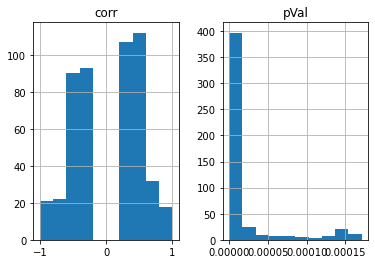

In [28]:
amesHousingSigCorrs.hist(bins=10)

In [29]:
amesHousingSigCorrs.head()

,pair,corr,pVal
5800,HalfBath-MSSubClass_60,1.0,0.0
5878,HalfBath-HouseStyle_2Story,1.0,0.0
11188,MSSubClass_20-HouseStyle_1Story,1.0,0.0
12391,MSSubClass_60-HouseStyle_2Story,1.0,0.0
21538,Neighborhood_NAmes-Foundation_CBlock,1.0,0.0


In [30]:
amesHousingSigCorrs['pair'].str.contains('YearBuilt')

5800     False
5878     False
11188    False
12391    False
21538    False
         ...  
27945    False
11262    False
27462    False
31065    False
32906    False
Name: pair, Length: 495, dtype: bool

In [31]:
[1,2,3]+[]

[1, 2, 3]

In [32]:
relatedDummiesDictionary["MasVnrType_BrkFace"]

['MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'MasVnrType_nan']

In [33]:
sigCorrDictionary = {}
for col in amesHousingNumericalData.columns:
    correlatedRelations = (amesHousingSigCorrs[amesHousingSigCorrs['pair'].str.contains(col)])["pair"]
    correlatedColumns = [name.replace("-","").replace(col,"") for name in correlatedRelations]
    relatedDummies = []
    for corrCol in correlatedColumns:
        if corrCol in relatedDummiesDictionary.keys():
            print(corrCol)
            relatedDummies = relatedDummies + relatedDummiesDictionary[corrCol]
    correlatedColumns = list(set(correlatedColumns + relatedDummies))
    sigCorrDictionary[col] = correlatedColumns

MasVnrType_BrkFace
Neighborhood_CollgCr
Neighborhood_Gilbert
GarageFinish_RFn
ExterQual_Gd
FireplaceQu_nan
KitchenQual_Gd
ExterQual_TA
Neighborhood_NridgHt
HeatingQC_Gd
KitchenQual_TA
Exterior1st_VinylSd
Exterior2nd_VinylSd
Exterior1st_HdBoard
Exterior2nd_HdBoard
BsmtQual_Gd
LotShape_Reg
MSSubClass_60
HouseStyle_2Story
MSSubClass_20
HouseStyle_1Story
GarageType_BuiltIn
GarageType_Attchd
FireplaceQu_nan
Neighborhood_NridgHt
Neighborhood_NridgHt
MasVnrType_None
Neighborhood_Gilbert
ExterQual_TA
MasVnrType_Stone
HeatingQC_Gd
KitchenQual_TA
ExterQual_Gd
RoofStyle_Hip
RoofStyle_Gable
Exterior1st_VinylSd
Exterior2nd_VinylSd
BsmtQual_Gd
Neighborhood_NridgHt
Neighborhood_Gilbert
FireplaceQu_TA
BsmtQual_Gd
MSSubClass_20
HouseStyle_1Story
MSSubClass_60
HouseStyle_2Story
HeatingQC_Gd
MasVnrType_Stone
LotConfig_Inside
Neighborhood_NridgHt
Neighborhood_Gilbert
ExterQual_TA
Neighborhood_Gilbert
Neighborhood_NridgHt
KitchenQual_TA
ExterQual_Gd
MasVnrType_Stone
MasVnrType_None
RoofStyle_Hip
RoofStyle_

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)



MasVnrType_BrkFace
Neighborhood_NridgHt
MasVnrType_Stone
Neighborhood_Gilbert
KitchenQual_TA
Neighborhood_NridgHt
MasVnrType_None
BsmtQual_Gd
MSSubClass_20
HouseStyle_1Story
MSSubClass_60
HouseStyle_2Story
ExterQual_TA
KitchenQual_TA
KitchenQual_Gd
Exterior1st_VinylSd
Exterior2nd_VinylSd
Neighborhood_Gilbert
FireplaceQu_TA
Exterior1st_HdBoard
Exterior2nd_HdBoard
HeatingQC_Gd
Neighborhood_CollgCr
BsmtQual_TA
ExterQual_Gd
KitchenQual_TA
Neighborhood_Gilbert
Exterior1st_VinylSd
Exterior2nd_VinylSd
KitchenQual_Gd
FireplaceQu_TA
HeatingQC_Gd
Exterior1st_HdBoard
Exterior2nd_HdBoard
Neighborhood_CollgCr
BsmtQual_TA
FireplaceQu_Gd
BsmtExposure_No
Neighborhood_NAmes
Foundation_PConc
Exterior1st_MetalSd
Exterior2nd_MetalSd
BsmtQual_TA
Neighborhood_NAmes
Foundation_CBlock
Exterior1st_MetalSd
Exterior2nd_MetalSd
BsmtQual_TA
BsmtQual_TA
Neighborhood_NridgHt
MasVnrType_Stone
BsmtQual_Gd
Neighborhood_NAmes
Foundation_CBlock
Foundation_PConc
ExterQual_TA
ExterQual_Gd
Exterior1st_MetalSd
Exterior2nd_M

In [34]:
sigCorrDictionary

{'Unnamed: 0': ['MasVnrType_BrkFace',
  'MasVnrType_None',
  'MasVnrType_nan',
  'MasVnrType_Stone'],
 'PID': ['KitchenQual_TA',
  'Exterior2nd_VinylSd',
  'ExterQual_TA',
  'Exterior2nd_Stone',
  'Exterior2nd_ImStucc',
  'BsmtQual_Gd',
  'Neighborhood_SawyerW',
  'LotShape_IR2',
  'BsmtQual_nan',
  'HeatingQC_TA',
  'BsmtQual_Fa',
  'Neighborhood_Mitchel',
  'KitchenQual_Fa',
  'Neighborhood_IDOTRR',
  'Exterior2nd_Plywood',
  'Neighborhood_Greens',
  'Exterior2nd_CBlock',
  'Neighborhood_Timber',
  'Exterior2nd_Wd Shng',
  'ExterQual_Gd',
  'Exterior2nd_BrkFace',
  'Exterior2nd_HdBoard',
  'Exterior1st_Stucco',
  'Exterior1st_HdBoard',
  'Neighborhood_Blueste',
  'Exterior2nd_PreCast',
  'GarageFinish_nan',
  'Exterior2nd_Wd Sdng',
  'Exterior2nd_Stucco',
  'Neighborhood_SWISU',
  'LotShape_Reg',
  'Neighborhood_Somerst',
  'Neighborhood_OldTown',
  'Exterior2nd_Brk Cmn',
  'FireplaceQu_Fa',
  'Exterior1st_MetalSd',
  'Neighborhood_Landmrk',
  'Exterior1st_PreCast',
  'KitchenQual_Po

In [35]:
powers = np.linspace(1,10,10)
X = (np.random.random(1000)*1000).reshape(-1, 1)
for power in powers:
    y = X ** power
    linmodel = lm.LinearRegression()
    linmodel.fit(np.log(X),np.log(y))
    print(f'power = {power} and slope is {linmodel.coef_[0,0]}')
    
    

power = 1.0 and slope is 0.9999999999999996
power = 2.0 and slope is 1.9999999999999991
power = 3.0 and slope is 3.0
power = 4.0 and slope is 3.9999999999999982
power = 5.0 and slope is 4.999999999999999
power = 6.0 and slope is 6.0
power = 7.0 and slope is 6.999999999999998
power = 8.0 and slope is 7.9999999999999964
power = 9.0 and slope is 9.0
power = 10.0 and slope is 9.999999999999998


In [36]:
housingTrainWithDummies = pd.read_csv('../data/housingTrainWithDummies.csv')
set(housingTrainWithDummies.dtypes)

/Users/garysimmons/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


{dtype('int64'), dtype('float64'), dtype('O')}